# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [3]:
#Your code here
df.columns = df.columns.str.lower()

## Change the Index to be the Line Names

In [5]:
#Your code here
df = df.set_index("linename")

## Painstakingly change the index back

In [6]:
# Your code here
df.reset_index(inplace = True)

## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [7]:
# Your code here
df['Num_Lines'] = df.linename.map(lambda x:len(x))

In [9]:
df.head(10)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425,7
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460,7
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461,7
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483,7
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524,7


## Write a function to clean a column name

In [10]:
def clean(col_name):
    cleaned = col_name.strip()
    return cleaned

In [11]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [12]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

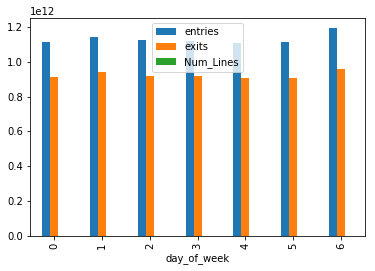

In [19]:
#Your code here
df.date = pd.to_datetime(df.date)
df['day_of_week'] = df.date.dt.dayofweek
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind = 'bar')


## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [ ]:
#Your code here

## Drop a couple of columns

In [21]:
# Your code here
df.drop(['Num_Lines', 'c/a'], axis = 1)

,linename,unit,scp,station,division,date,time,desc,entries,exits,day_of_week
0,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,5
1,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,5
2,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,5
3,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,5
4,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,5
5,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-25,20:00:00,REGULAR,6736562,2283425,5
6,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-26,00:00:00,REGULAR,6736683,2283460,6
7,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-26,04:00:00,REGULAR,6736696,2283461,6
8,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-26,08:00:00,REGULAR,6736705,2283483,6
9,NQR456W,R051,02-00-00,59 ST,BMT,2018-08-26,12:00:00,REGULAR,6736746,2283524,6


## Summary

Great! You practiced your data cleanup-skills using Pandas.